# Customer Segmentation for Marketing Campaign

## About Dataset

The purpose of this data science project is to perform a customer segmentation, which is critical practice in the marketing sector that enables businesses to tailor their strategies more effectively and improve customer engagement. By dividing customers into distinct groups based on shared characteristics, companies can create highly targeted marketing campaigns, optimize resource allocation, and ultimately enhance the satisfaction level and loyalty of customers.

## Customer Segmentation

In today’s competitive market landscape, understanding the diverse needs and behaviors of customers is an essential task. Customer segmentation allows businesses to:

* **Personalize Marketing**: Deliver tailored messages and offers that resonate with specific groups.
* **Enhance Customer Service**: Understand and anticipate the needs of different segments to improve service delivery.
* **Optimize Pricing Strategies**: Adjust pricing based on the purchasing behavior and sensitivity of different segments.
* **Drive Product Development**: Design or modify products to meet the specific needs of targeted segments.

## Data Dictionary
**Customer's Personal Attributes**

  * **ID**

    * Numerical
    * It is a unique identifier for each customer.

  * **Year_Birth**

    * Numerical
    * The year of birth for each customer. It helps to categorise customers with their age.

  * **Education**
    * Categorical
    * The education level of each customer. It helps to categorise customers with their level of education.

  * **Marital_Status**
    * Categorical
    * The maritial status of each customer. It helps to categorise customers with their size of family.

  * **Income**
    * Numerical
    * The yearly household income of a customer.

  * **Kidhome**
    * Numerical
    * The number of children in customer's household. It helps to categorise customers with their size of family.

  * **Teenhome**
    * Numerical
    * The number of teenagers in customer's household.It also helps to categorise customers with their size of family.

  * **Dt_Customer**
    * Date
    * The date of customer's enrollment with the company. It helps to segment the customer according to their loalty.

  * **Recency**
    * Numerical
    * The number of days since customer's last purchase.

  * **Complain**
    * Categorical
    * Whether the customer complained in the last 2 years or not. **1**= Yes, **0**= No

**Attributes for Product Purchase in last 2 years**

  * **MntWines**
    * Numerical
    * Amount spent on wine in last 2 years by a customer.

  * **MntFruits**
    * Numerical
    * Amount spent on fruits in last 2 years by a customer.

  * **MntMeatProducts**
    * Numerical
    * Amount spent on meat in last 2 years by a customer.

  * **MntFishProducts**
    * Numerical
    * Amount spent on fish in last 2 years by a customer.

  * **MntSweetProducts**
    * Numerical
    * Amount spent on sweets in last 2 years by a customer.

  * **MntGoldProds**
    * Numerical
    * Amount spent on gold in last 2 years by a customer.

**Attributes for purchase due to promotion**

  * **NumDealsPurchases**
    * Numerical
    * Number of purchases made with a discount by a customer.
     
  * **AcceptedCmp1**
    * Categorical
    * Whether customer accepted the offer in the 1st campaign or not. **1** = Yes, **0** = No

  * **AcceptedCmp2**
    * Categorical
    * Whether customer accepted the offer in the 2nd campaign or not. **1** = Yes, **0** = No

  * **AcceptedCmp3**
    * Categorical
    * Whether customer accepted the offer in the 3rd campaign or not. **1** = Yes, **0** = No

  * **AcceptedCmp4**
    * Categorical
    * Whether customer accepted the offer in the 4th campaign or not. **1** = Yes, **0** = No

  * **AcceptedCmp5**
    * Categorical
    * Whether customer accepted the offer in the 5th campaign or not. **1** = Yes, **0** = No

  * **Response**
    * Categorical
    * Whether customer accepted the offer in the last campaign or not. **1** = Yes, **0** = No

**Attributes for place of purchase**

  * **NumWebPurchases**
    * Numerical
    * Number of purchases made through the company’s website by a customer.

  * **NumCatalogPurchases**
    * Numerical
    * Number of purchases made using a catalogue by a customer.

  * **NumStorePurchases**
    * Numerical
    * Number of purchases made directly visitng the store by a customer.

  * **NumWebVisitsMonth**
    * Numerical
    * Number of visits to company’s website in the last month by a customer.



## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* Create a profile for different groups(or clusters) to explore the dynamics of customer segmentation.

### Load the necessary Libraries

In [86]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import os
import datetime

%matplotlib inline
sns.set_style('darkgrid')

### Load Dataset and find what it contains

In [2]:
folder_path = "drive/MyDrive/Colab Notebooks/dscourse/data"
file_path = os.path.join(folder_path, "marketing_campaign.csv")
df = pd.read_csv(file_path, delimiter= "\t")

In [3]:
# Find shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 2240
Number of columns: 29


In [4]:
# Show 1st 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Checking Data Types

By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Observations

* There are some missing values present in **Income** column.
* **Dt_Customer** indicates the date on which customer joined but not set as Datetime. It needs to be converted to Datetime from object.
* There are only 2 categorical features **Education** and **Matretial_Status**.

#### Convert Dt_Customer from object type to date

In [6]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y", errors="coerce")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [8]:
def missing_values(df):
  missing_cols = []
  for col in df.columns:
    if df[col].isnull().sum() > 0:
      print(f"Number of missing values in {col}: {df[col].isnull().sum()} i.e. {(df[col].isnull().sum()/df.shape[0] * 100) :.2f}%")
      missing_cols.append(col)
  return missing_cols

In [9]:
missing_cols = missing_values(df)
if len(missing_cols) == 0:
  print("None of the feature contains any missing value.")

Number of missing values in Income: 24 i.e. 1.07%


### Observation

As number of missing values in **Income** is only **1%** of total data we we can drop these rows.

In [10]:
df= df.dropna()
print(f"Number of rows after dropping missing values: {len(df)}")

Number of rows after dropping missing values: 2216


### Feature Creation & Modification

To gain deeper insights into the dataset we will create some new features based on some existing ones. We will do that in following manner:

* Derive the **Age** of customer from **YearOfBirth** feature to get better understanding about demographic distribution.
* Derive the **Customer_For** feature from **DT_Customer** that indicates the number of years the customer make purchase.
* Introduce **Spent** feature that aggregates all categories of expenditure to check the purchase beheviour of customer,
* Derive **Living_With** feature from **Marital_Status** to categorise the custome who living with "Partner(2)" or living "Alone(1)".
* Introduce **Children** feature to get total number of children in household, aggregating kids and teenages.
* Introduce **Family_Size** feature by aggregating **Living_With** and **Children** to provide clear picture members of family.
* Modify the **Education** to clssify it more broadly as **Undergraduate** (Basic and 2n Cycle), **Graduate** (Graduation) and **Postgraduate** (Master, PhD).

In [11]:
# Derive Age
df["Age"] = datetime.datetime.now().year - df["Year_Birth"]

In [12]:
# Sanity check
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,43


In [25]:
df["Customer_For"] = datetime.datetime.now().year - df["Dt_Customer"].dt.year

In [26]:
# Sanity check
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,12
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,70,10
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,10


In [28]:
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [29]:
df["Living_With"] = df["Marital_Status"].apply(lambda x: 2 if x == "Married" or x == "Together" else 1)

In [30]:
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [31]:
df["Family_Size"] = df["Living_With"] + df["Children"]

In [37]:
df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
    })

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

### Duplicate Row Detection

Detecting duplicate rows and removing them is vital for ensuring quality of data, integrity, accuracy and performance.

In [39]:
print(f"Number of duplicate rows: {df[df.duplicated()].shape[0]}")

Number of duplicate rows: 0


#### Remove Unnecessary Columns

Removing unnecessary columns helps in reducing noise, optimizing resources and enhance quality and clarity of data.

Here ID, Year_Birth, Marital_Status, Z_CostContact, Z_Revenue and Dt_Customer Key columns are not needed for EDA or modeling as they are containing unique values, so they should be removed.

In [42]:
df1 = df.drop(["ID", "Year_Birth", "Marital_Status", "Z_CostContact", "Z_Revenue", "Dt_Customer"], axis=1)

In [43]:
# Sanity check
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

## Categorical Features Encoding

Encoding the categorical feature means encode it to nemerical values for standard scaling and clustering

In [44]:
# As Education is an ordinal variable so we encode it using mapping by setting order.
education = {
    "Undergraduate": 1,
    "Graduate": 2,
    "Postgraduate": 3
}
df2 = df1.copy()
df2["Education"] = df1["Education"].map(education)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

### Data Preparation

Scaling features ensure that all features contribute equally to the cluster formation, leading to more meaningful and accurate clusters.

In [108]:
sc = StandardScaler()
scaled = sc.fit_transform(df2.values)

### Dimensionality Reduction

As this dataset has 29 features, we use the **PCA(Principal Component Analysis)** for the folloing purpose,

* PCA can help to simplify the data by reducing the dimension and improve clustering performance.
* PCA can help by projecting the data into a space where these structures are more distinct.

In [109]:
pca = PCA(n_components= 3)
pca_scaled = pca.fit_transform(scaled)

In [110]:
df_pca = pd.DataFrame(pca_scaled, columns= ["PC1", "PC2", "PC3"])
df_pca.head()

,PC1,PC2,PC3
0,4.676287,-0.449484,0.006771
1,-2.916231,-0.015002,-0.270400
2,1.964286,-0.568000,-1.148236
3,-2.659753,-1.559758,-0.005953
4,-0.670936,0.155669,-0.696877


## Clustering

### Use DBSCAN clustering

First, we will determine the best epsilon and min Pts. parameters for DBSCAN using Silhouette score.
Then we use that best values for clustering the dataset

In [111]:
epsilon_ranges = np.linspace(0.1, 10, 50)
min_samples_ranges = range(3, 10)
best_ep = epsilon_ranges[0]
best_min_samples = min_samples_ranges[0]
best_score = -1

for ep in epsilon_ranges:
  for m_pts in min_samples_ranges:
    model = DBSCAN(eps= ep, min_samples= m_pts)
    model.fit(pca_scaled)
    labels = model.labels_
    if len(set(labels)) >1:
      score = silhouette_score(pca_scaled, labels)
      if score > best_score:
        best_ep = ep
        best_min_samples = m_pts
        best_score = score

print(f"Best Epsilon: {best_ep}")
print(f"Best Min_Samples: {best_min_samples}")
print(f"Best Silohouette Score: { best_score}")

Best Epsilon: 2.1204081632653065
Best Min_Samples: 3
Best Silohouette Score: 0.5384407212223381


### Observations

We will use epsilon value as **2.1204081632653065** and min_samples values as **3**. This set of value is best for this dataset for applying DBSCAN clustering.

In [112]:
# Apply SBSCAN clustering with best values of parameters.
model = DBSCAN(eps= best_ep, min_samples= best_min_samples)
model.fit(pca_scaled)
labels = model.labels_

In [113]:
df_cluster = pd.DataFrame(labels, columns= ["cluster"])

In [114]:
df_final = pd.concat([df1, df_cluster], axis= 1)

In [115]:
df_final.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,Age,Customer_For,Spent,Living_With,Children,Family_Size,cluster
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,67,12,1617,1,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,70,10,27,1,2,3,0
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,59,11,776,2,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,40,10,53,2,1,3,0
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,43,10,422,2,1,3,0


In [116]:
df_final["cluster"].value_counts().sort_index()

cluster
-1       2
 0    2214
Name: count, dtype: int64

In [117]:
df_cleaned = df_final[df_final["cluster"] != -1]

## Use KMeans Clustering

In [118]:
# Add cluster label to PCA data
df_pca["cluster"] = labels

In [119]:
df_pca["cluster"].value_counts().sort_index()

cluster
-1       2
 0    2214
Name: count, dtype: int64

In [120]:
# Remove outliers before applying to KMeans
df_pca_cleaned = df_pca[df_pca["cluster"] != -1]

In [121]:
# Remove cluster column from PCA cleaned data
pca_cleaned_scaled = df_pca_cleaned.drop(["cluster"], axis=1).values

Text(0.5, 1.0, 'Silhouette Score')

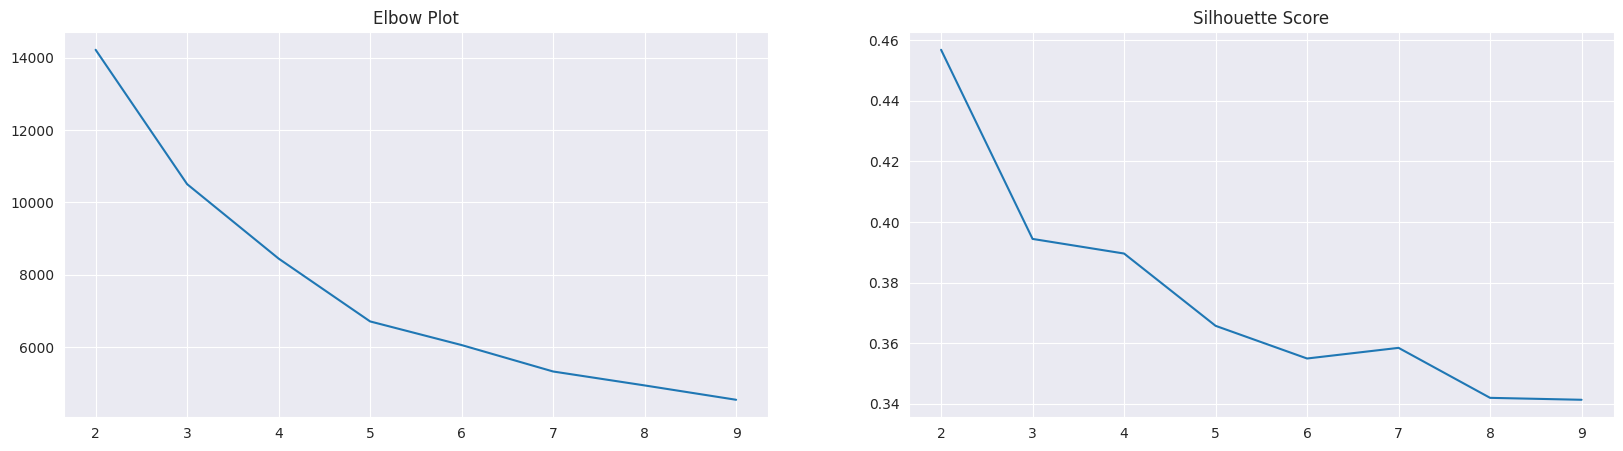

In [122]:
# Find the best number of clusters as parameter in KMenas
clusters = range(2, 10)
wcss = [];
s_scores = []

for c in clusters:
  model = KMeans(n_clusters= c, random_state= 42, n_init= "auto")
  model.fit(pca_cleaned_scaled)
  wcss.append(model.inertia_)
  # Find Silhouette score
  score = silhouette_score(pca_cleaned_scaled, model.labels_)
  s_scores.append(score)

# Plot wcss to find elbow and silhouette score
fi, ax= plt.subplots(nrows= 1, ncols= 2, figsize=(20, 5))
sns.lineplot(x=clusters, y= wcss, ax= ax[0])
ax[0].set_title("Elbow Plot")

sns.lineplot(x=clusters, y=s_scores, ax=ax[1])
ax[1].set_title("Silhouette Score")

### Observations

From the Elbow plot we found that there are two points 3 and 5 forms elbow.

On the other hand from silhouette score plot we found higher silhouette score for 3 than 5.

So we decided to use **3** clusters in KMeans

In [123]:
# Cluster with KMeans
model = KMeans(n_clusters= 3, random_state= 42, n_init= "auto")
model.fit(pca_cleaned_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [124]:
# Reindex the pca cleanded data frame
df_pca_cleaned = df_pca_cleaned.reset_index(drop=True)

In [125]:
# Set the labels in the pca cleaned dataset
labels = model.labels_

df_pca_cleaned["cluster"] = labels

Text(0.5, 0, 'PC3')

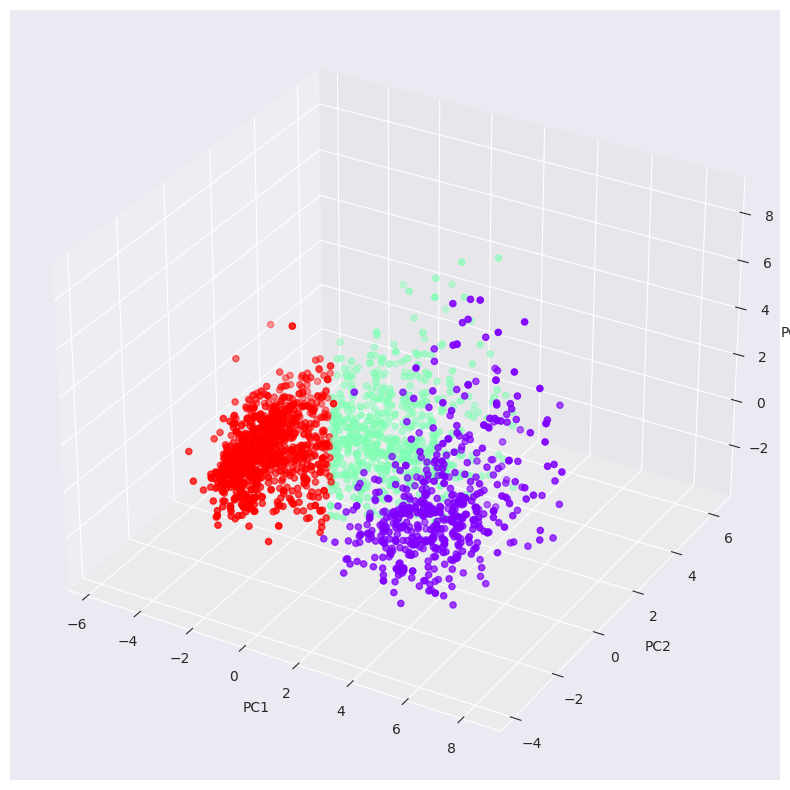

In [128]:
fig= plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1, projection="3d")

x= df_pca_cleaned["PC1"]
y = df_pca_cleaned["PC2"]
z = df_pca_cleaned["PC3"]

ax.scatter(x,y, z, c= df_pca_cleaned["cluster"], cmap= "rainbow")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")